# Measuring urban form: Overcoming terminological inconsistencies for a quantitative and comprehensive morphologic analysis of cities

Jupyter notebook used to generate analysis of the database of morphological characters.

Note: This is the real notebook which was used, so it might a bit rough at some points :).

For more information see [this blogpost](http://martinfleischmann.net/confused-terminology-in-urban-morphology]) or [the paper itself](https://journals.sagepub.com/doi/10.1177/2399808320910444).

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
sns.set()

In [3]:
data = pd.read_csv('characters.csv', index_col=0, delimiter=';')

In [4]:
data

,Index,Element,Scale of grain,Scale of information extent,Reference
Category,,,,,
Dimension,Area,Block,Block,Block,Dibble (2016)
Dimension,Built-up area,Block,Block,Block,Gil (2012)
Dimension,Depth,Block,Block,Block,Sevtsuk (2016)
Dimension,Gross floor area,Block,Block,Block,Gil (2012)
Dimension,Height,Block,Block,Block,Hermosilla (2014)
...,...,...,...,...,...
Diversity,Plot Area Diversity,Case study,Urban Area/Neighbourhood,Urban Area/Neighbourhood,"Bourdic, Salat and Nowacki (2012)"
Diversity,Block Area Power law distribution,Neighborhood,Urban Area/Neighbourhood,Urban Area/Neighbourhood,Louf and Barthelemy (2014)
Diversity,Block Shape factor Probaility conditional dist...,Neighborhood,Urban Area/Neighbourhood,Urban Area/Neighbourhood,Louf and Barthelemy (2014)


In [15]:
statistics_grain = pd.DataFrame(index = ['Block', 'Neighbourhood', 'Urban Area'], columns = ['Dimension', 'Shape', 'Distribution', 'Intensity', 'Connectivity', 'Diversity']).fillna(0)

In [16]:
for idx, r in data.iterrows():
    for scale in ['Block', 'Neighbourhood', 'Urban Area']:
        if scale in r['Scale of grain']:
            for cat in ['Dimension', 'Shape', 'Distribution', 'Intensity', 'Connectivity', 'Diversity']:
                if cat == idx:   
                    statistics_grain.loc[scale, cat] = statistics_grain.loc[scale, cat] + 1

In [20]:
statistics_grain['Total'] = statistics_grain.sum(axis=1)

In [21]:
statistics_grain.loc['Total']= statistics_grain.sum()

In [23]:
statistics_grain.rename(index={'Block': "Small", "Neighbourhood": "Medium", "Urban Area": "Large"}, inplace=True)

In [9]:
sns.set_style("whitegrid")
sns.set_context("paper")

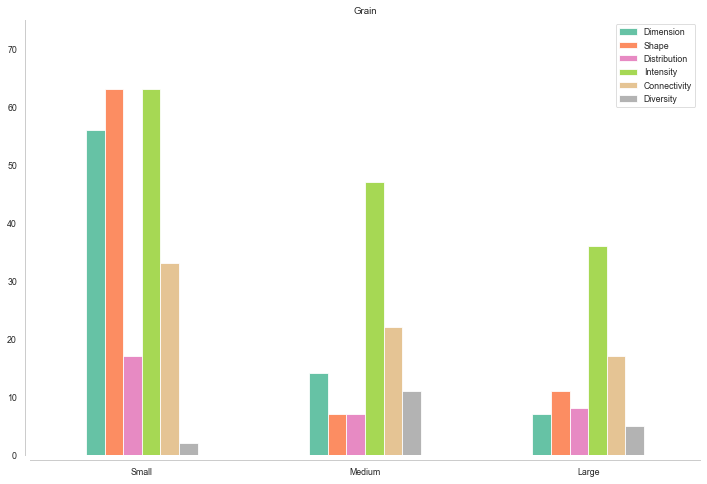

In [16]:
ax = statistics_grain.drop(columns='Total').drop('Total').plot(kind='bar', figsize=(12, 8), cmap='Set2')
sns.despine(offset=5)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
plt.title('Grain')
ax.set_ylim([0, 75])
plt.savefig('divided_bar.svg')

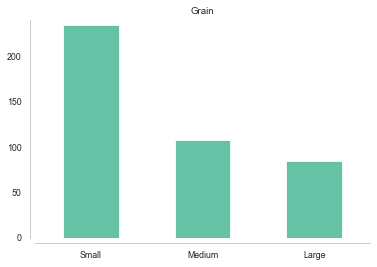

In [22]:
ax = statistics_grain.Total.drop('Total').plot(kind='bar', figsize=(6, 4), cmap='Set2')
sns.despine(offset=5)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
plt.title('Grain')
ax.set_ylim([0, 240])
plt.savefig('total_grain.svg')

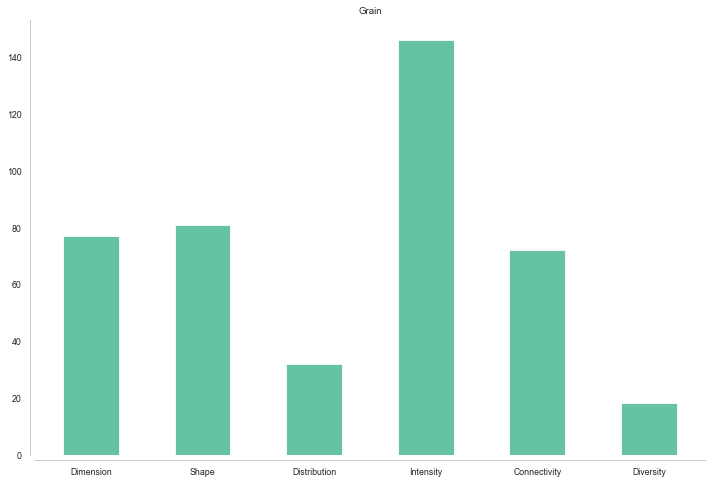

In [27]:
ax = statistics_grain.loc['Total'].drop('Total').plot(kind='bar', figsize=(12, 8), cmap='Set2')
sns.despine(offset=5)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
plt.title('Grain')
plt.savefig('total_categories.png')

In [36]:
statistics_extent = pd.DataFrame(index = ['Block', 'Neighbourhood', 'Urban Area'], columns = ['Dimension', 'Shape', 'Distribution', 'Intensity', 'Connectivity', 'Diversity']).fillna(0)

In [37]:
for idx, r in data.iterrows():
    for scale in ['Block', 'Neighbourhood', 'Urban Area']:
        if scale in r['Scale of information extent']:
            for cat in ['Dimension', 'Shape', 'Distribution', 'Intensity', 'Connectivity', 'Diversity']:
                if cat == idx:   
                    statistics_extent.loc[scale, cat] = statistics_extent.loc[scale, cat] + 1

In [38]:
statistics_extent['Total'] = statistics_extent.sum(axis=1)
statistics_extent.loc['Total']= statistics_extent.sum()
statistics_extent.rename(index={'Block': "Small", "Neighbourhood": "Medium", "Urban Area": "Large"}, inplace=True)

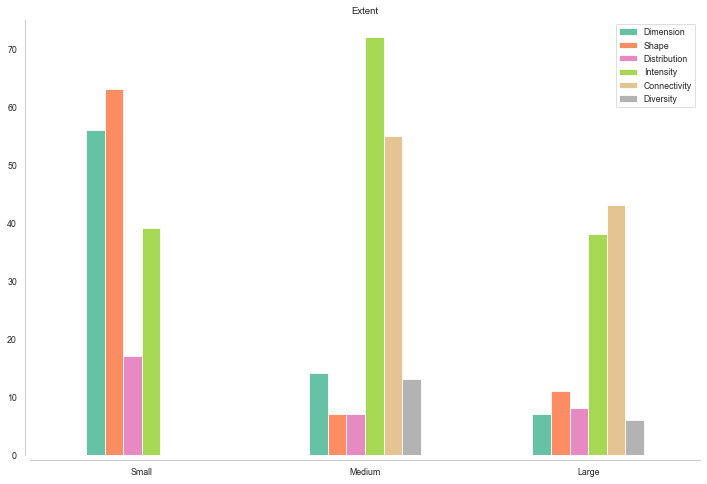

In [17]:
ax = statistics_extent.drop(columns='Total').drop('Total').plot(kind='bar', figsize=(12, 8), cmap='Set2')
sns.despine(offset=5)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
plt.title('Extent')
ax.set_ylim([0, 75])
plt.savefig('divided_bar_ext.svg')

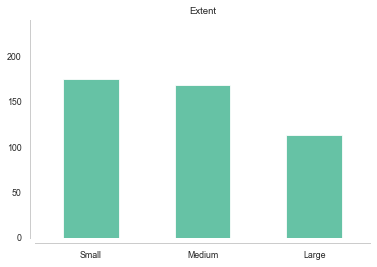

In [23]:
ax = statistics_extent.Total.drop('Total').plot(kind='bar', figsize=(6, 4), cmap='Set2')
sns.despine(offset=5)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
plt.title('Extent')
ax.set_ylim([0, 240])
plt.savefig('total_ext.svg')

Text(0.5, 1.0, 'Extent')

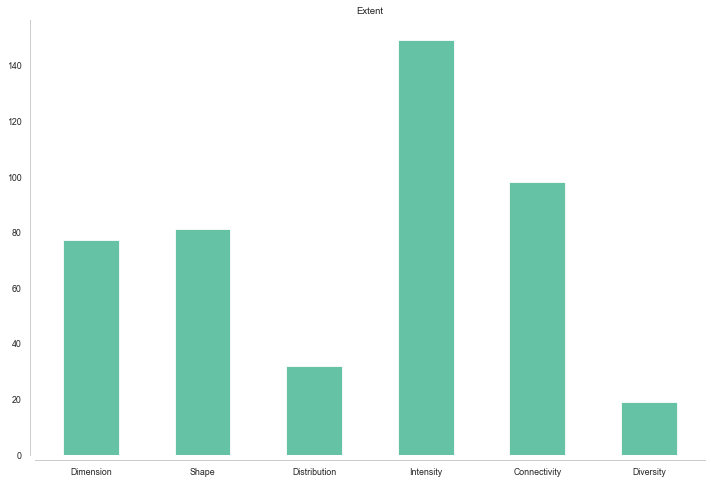

In [42]:
ax = statistics_extent.loc['Total'].drop('Total').plot(kind='bar', figsize=(12, 8), cmap='Set2')
sns.despine(offset=5)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
plt.title('Extent')
#plt.savefig('total_categories.png')

In [43]:
statistics_extent.to_csv("statistics_extent.csv")
statistics_grain.to_csv("statistics_grain.csv")

In [47]:
statistics_extent

,Dimension,Shape,Distribution,Intensity,Connectivity,Diversity,Total
Small,56,63,17,39,0,0,175
Medium,14,7,7,72,55,13,168
Large,7,11,8,38,43,6,113
Total,77,81,32,149,98,19,456


In [48]:
statistics_grain

,Dimension,Shape,Distribution,Intensity,Connectivity,Diversity,Total
Small,56,63,17,63,33,2,234
Medium,14,7,7,47,22,11,108
Large,7,11,8,36,17,5,84
Total,77,81,32,146,72,18,426


In [24]:
df = pd.DataFrame(data.index.value_counts(sort=False))

df['index2'] = pd.Categorical(
    df.index, 
    categories=['Dimension','Shape','Distribution','Intensity','Connectivity','Diversity'], 
    ordered=True)

In [78]:
df

,Category,index2
Distribution,27,Distribution
Connectivity,55,Connectivity
Dimension,73,Dimension
Diversity,13,Diversity
Shape,78,Shape
Intensity,115,Intensity


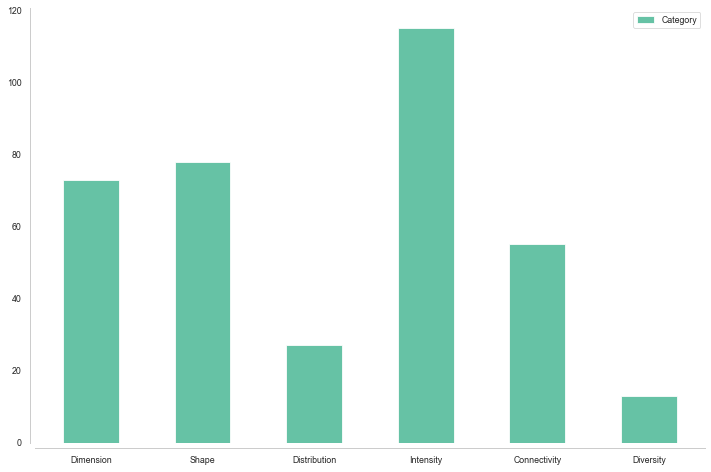

In [26]:
ax = df.sort_values('index2').plot(kind='bar', figsize=(12, 8), cmap='Set2')
sns.despine(offset=5)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
plt.savefig('cats.svg')

In [73]:
pd.DataFrame(data.index.value_counts(sort=False)).reset_index()

,index,Category
0,Distribution,27
1,Connectivity,55
2,Dimension,73
3,Diversity,13
4,Shape,78
5,Intensity,115
